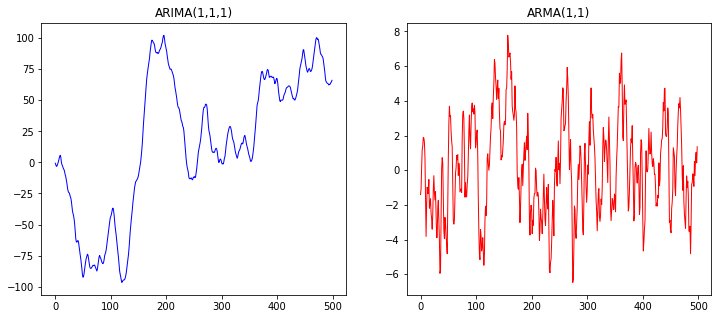

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from MyUtil.MyTimeSeries import sampleARIMA, checkNormality
from statsmodels.tsa.arima_model import ARIMA
y=sampleARIMA(ar=[0.8],d=1,ma=[0.5],n=500)
d=np.diff(y) #y의 차분

fig=plt.figure(figsize=(12,5))
p1=fig.add_subplot(1,2,1)
p2=fig.add_subplot(1,2,2)
p1.plot(y,color='b',linewidth=1)
p2.plot(d,color='red',linewidth=1)
p1.set_title("ARIMA(1,1,1)")
p2.set_title("ARMA(1,1)")
plt.show()
#ARIMA 는 왼쪽 그래프를 오른쪽으로 변환하여 예측이 가능하도록 만들기 위함

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  499
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -719.862
Method:                       css-mle   S.D. of innovations              1.022
Date:                Wed, 20 Feb 2019   AIC                           1447.723
Time:                        11:32:10   BIC                           1464.574
Sample:                             1   HQIC                          1454.336
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2760      0.283      0.974      0.331      -0.279       0.831
ar.L1.D.y      0.7569      0.032     23.494      0.000       0.694       0.820
ma.L1.D.y      0.5164      0.045     11.557      0.0

C:\Users\user\anac\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


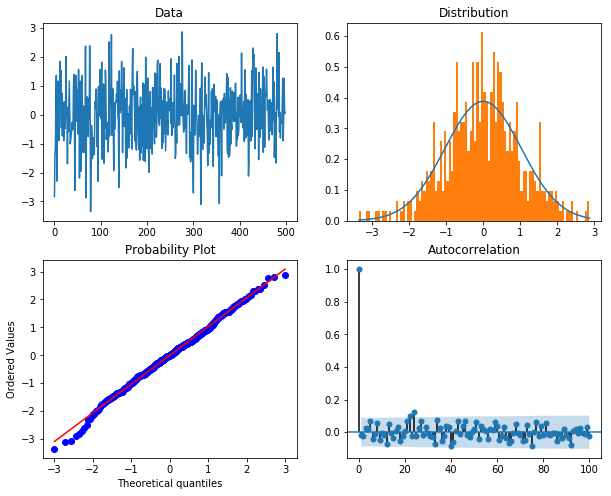

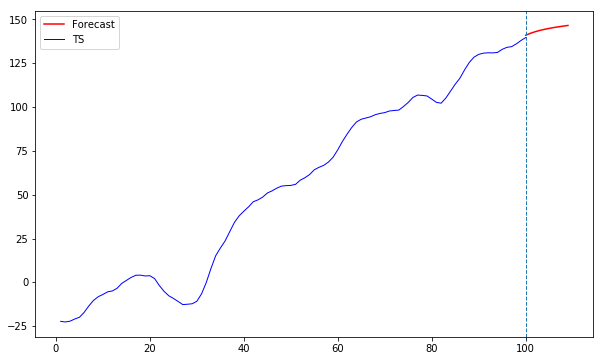

In [6]:
y=sampleARIMA(ar=[0.8],d=1,ma=[0.5],n=500)
model =ARIMA(y,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())
residual =model_fit.resid
checkNormality(residual)

forecast=model_fit.forecast(steps=10)[0]
ytail=y[len(y)-100:]
ax1=np.arange(1,len(ytail)+1)
ax2=np.arange(len(ytail),len(ytail)+len(forecast))
plt.figure(figsize=(10,6))
plt.plot(ax2,forecast,c='r',label='Forecast')
plt.plot(ax1,ytail,c='b',label='TS',linewidth=1)
plt.axvline(x=ax1[-1],linestyle='dashed',linewidth=1)
plt.legend()
plt.show()

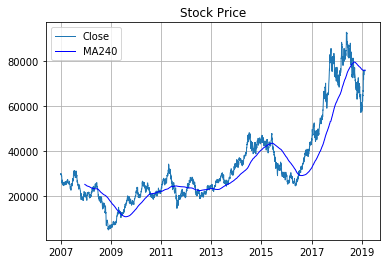

In [11]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt

start= dt.datetime(2007,1,1) #데이터 마지노선
end=dt.date.today()
#주가수정비율 반영 -> adjust_price=True
s=web.YahooDailyReader('000660.KS',start,end,adjust_price=True).read() 
plt.plot(s['Close'],linewidth=1)
s['sma240']=s['Close'].rolling(window=240).mean()
s=s.dropna()

plt.figure(1,figsize=(10,5))
plt.plot(s['sma240'],linewidth=1,c='b', label="MA240")
plt.title("Stock Price")
plt.grid()
plt.legend()
plt.show()

## sk하이닉스 종가 주가 예측하기

C:\Users\user\anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D2.sma240   No. Observations:                 2758
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -8400.631
Method:                       css-mle   S.D. of innovations              5.088
Date:                Wed, 20 Feb 2019   AIC                          16817.262
Time:                        11:50:19   BIC                          16864.640
Sample:                             2   HQIC                         16834.377
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0217      0.084      0.257      0.797      -0.144       0.187
ar.L1.D2.sma240    -0.3865      0.287     -1.348      0.178      -0.949       0.175
ar.L2.D2.sma240    -0.3679      

C:\Users\user\anac\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


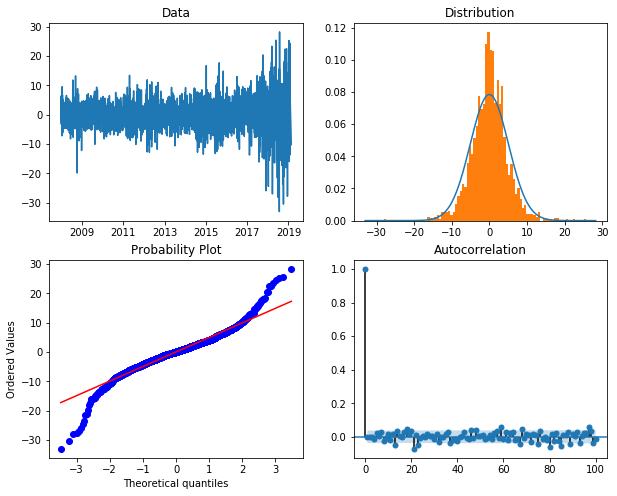

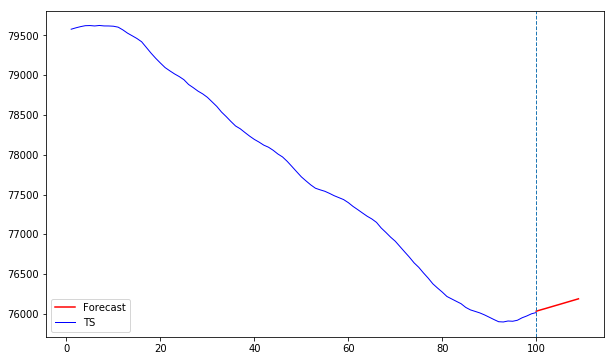

In [31]:
model=ARIMA(s['sma240'],order=(3,2,3)) #ARIMA모형은 들어맞지 않음
model_fit=model.fit()
print(model_fit.summary())
residual =model_fit.resid
checkNormality(residual)


y=s['sma240']
forecast=model_fit.forecast(steps=10)[0]
ytail=y[len(y)-100:]
ax1=np.arange(1,len(ytail)+1)
ax2=np.arange(len(ytail),len(ytail)+len(forecast))
plt.figure(figsize=(10,6))
plt.plot(ax2,forecast,c='r',label='Forecast')
plt.plot(ax1,ytail,c='b',label='TS',linewidth=1)
plt.axvline(x=ax1[-1],linestyle='dashed',linewidth=1)
plt.legend()
plt.show()

### keras

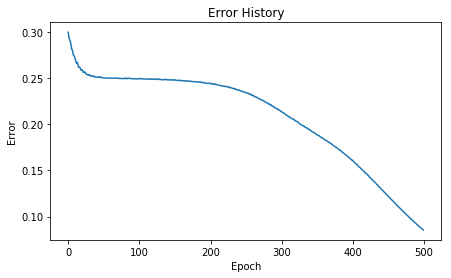

출력층 output:
[[0.227]
 [0.782]
 [0.726]
 [0.407]]


In [18]:
import numpy as np
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# XOR 계산을 위한 학습용 데이터를 구성한다
trainX = np.array([[0,0], [0,1], [1,0], [1,1]])     # 입력값 : 4 x 2 행렬
trainY = np.array([[0],[1],[1],[0]])                # 출력값 : 4 x 1 행렬

model = Sequential()
model.add(Dense(4, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))#은닉층이 증가할수록 오류가 빨리 감소함
adam = optimizers.Adam(lr = 0.01)
model.compile(loss='mse', optimizer=adam)
history = model.fit(trainX, trainY, batch_size = 1, epochs = 500, verbose=0)

# 학습 데이터 성능 곡선을 그린다
plt.figure(1, figsize=(7, 4))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error History')
plt.show()

# 학습 데이터에 대한 인공신경망의 출력을 확인한다
predY = model.predict(trainX)
print("출력층 output:")
print(predY)


# DNN file /multi category

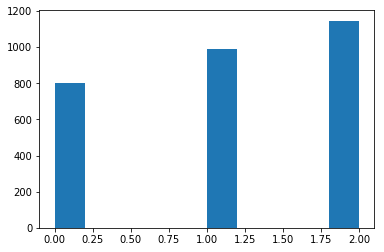

                macd       rsi       obv  liquidity  parkinson  volatility  \
Date                                                                         
2014-04-16  0.232051 -0.569401  0.508197   2.326309  -1.133247   -0.908764   
2016-07-27 -0.275923  1.005299  0.029679  -0.246535  -0.546692   -0.652241   
2007-06-20  0.997921 -0.249729 -1.964495   0.273255  -0.210980   -0.598472   
2009-07-03  1.158855  0.158884  0.529334   1.022534   0.221581    0.029761   
2008-10-01  0.656887 -0.365208 -1.903262   0.861535   1.069278    1.031473   

            class  
Date               
2014-04-16    2.0  
2016-07-27    0.0  
2007-06-20    2.0  
2009-07-03    2.0  
2008-10-01    1.0  
Train on 2351 samples, validate on 588 samples
Epoch 1/600
2351/2351 [==============================] - 1s 227us/step - loss: 1.1279 - acc: 0.3416 - val_loss: 1.1228 - val_acc: 0.3418
Epoch 2/600
2351/2351 [==============================] - 0s 21us/step - loss: 1.1002 - acc: 0.3786 - val_loss: 1.1003 - val_acc: 

2351/2351 [==============================] - 0s 20us/step - loss: 0.9919 - acc: 0.4734 - val_loss: 0.9832 - val_acc: 0.4762
Epoch 56/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9911 - acc: 0.4704 - val_loss: 0.9846 - val_acc: 0.4660
Epoch 57/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9902 - acc: 0.4747 - val_loss: 0.9830 - val_acc: 0.4711
Epoch 58/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9901 - acc: 0.4692 - val_loss: 0.9851 - val_acc: 0.4626
Epoch 59/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9889 - acc: 0.4794 - val_loss: 0.9848 - val_acc: 0.4558
Epoch 60/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.9876 - acc: 0.4755 - val_loss: 0.9850 - val_acc: 0.4592
Epoch 61/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9873 - acc: 0.4781 - val_loss: 0.9852 - val_acc: 0.4592
Epoch 62/600
2351/2351 [==============================

Epoch 115/600
2351/2351 [==============================] - 0s 21us/step - loss: 0.9628 - acc: 0.5074 - val_loss: 0.9703 - val_acc: 0.5085
Epoch 116/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9622 - acc: 0.5096 - val_loss: 0.9715 - val_acc: 0.5102
Epoch 117/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9623 - acc: 0.5108 - val_loss: 0.9706 - val_acc: 0.5085
Epoch 118/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9617 - acc: 0.5108 - val_loss: 0.9712 - val_acc: 0.5119
Epoch 119/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9619 - acc: 0.5074 - val_loss: 0.9717 - val_acc: 0.5051
Epoch 120/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9616 - acc: 0.5062 - val_loss: 0.9691 - val_acc: 0.5119
Epoch 121/600
2351/2351 [==============================] - 0s 21us/step - loss: 0.9619 - acc: 0.5091 - val_loss: 0.9691 - val_acc: 0.5136
Epoch 122/600
2351/2351 [=========

2351/2351 [==============================] - 0s 19us/step - loss: 0.9497 - acc: 0.5172 - val_loss: 0.9704 - val_acc: 0.4881
Epoch 175/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9501 - acc: 0.5151 - val_loss: 0.9693 - val_acc: 0.4915
Epoch 176/600
2351/2351 [==============================] - 0s 21us/step - loss: 0.9490 - acc: 0.5236 - val_loss: 0.9692 - val_acc: 0.4949
Epoch 177/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9498 - acc: 0.5202 - val_loss: 0.9708 - val_acc: 0.4898
Epoch 178/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9486 - acc: 0.5198 - val_loss: 0.9704 - val_acc: 0.4966
Epoch 179/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9489 - acc: 0.5262 - val_loss: 0.9704 - val_acc: 0.4949
Epoch 180/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.9483 - acc: 0.5232 - val_loss: 0.9701 - val_acc: 0.4966
Epoch 181/600
2351/2351 [=======================

2351/2351 [==============================] - 0s 18us/step - loss: 0.9391 - acc: 0.5325 - val_loss: 0.9678 - val_acc: 0.5000
Epoch 234/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9393 - acc: 0.5283 - val_loss: 0.9691 - val_acc: 0.4983
Epoch 235/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.9394 - acc: 0.5300 - val_loss: 0.9705 - val_acc: 0.5000
Epoch 236/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9383 - acc: 0.5308 - val_loss: 0.9690 - val_acc: 0.4966
Epoch 237/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9392 - acc: 0.5291 - val_loss: 0.9686 - val_acc: 0.4915
Epoch 238/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9381 - acc: 0.5338 - val_loss: 0.9684 - val_acc: 0.5000
Epoch 239/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9382 - acc: 0.5325 - val_loss: 0.9664 - val_acc: 0.5034
Epoch 240/600
2351/2351 [=======================

2351/2351 [==============================] - 0s 20us/step - loss: 0.9313 - acc: 0.5308 - val_loss: 0.9688 - val_acc: 0.5085
Epoch 293/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.9308 - acc: 0.5325 - val_loss: 0.9696 - val_acc: 0.4949
Epoch 294/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.9311 - acc: 0.5376 - val_loss: 0.9694 - val_acc: 0.5068
Epoch 295/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9322 - acc: 0.5270 - val_loss: 0.9704 - val_acc: 0.5034
Epoch 296/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9312 - acc: 0.5283 - val_loss: 0.9665 - val_acc: 0.5119
Epoch 297/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.9310 - acc: 0.5321 - val_loss: 0.9671 - val_acc: 0.5034
Epoch 298/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9305 - acc: 0.5287 - val_loss: 0.9689 - val_acc: 0.5119
Epoch 299/600
2351/2351 [=======================

2351/2351 [==============================] - 0s 20us/step - loss: 0.9240 - acc: 0.5334 - val_loss: 0.9729 - val_acc: 0.5136
Epoch 352/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9231 - acc: 0.5381 - val_loss: 0.9710 - val_acc: 0.5119
Epoch 353/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9232 - acc: 0.5372 - val_loss: 0.9713 - val_acc: 0.5136
Epoch 354/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9226 - acc: 0.5385 - val_loss: 0.9752 - val_acc: 0.4983
Epoch 355/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9227 - acc: 0.5355 - val_loss: 0.9704 - val_acc: 0.5153
Epoch 356/600
2351/2351 [==============================] - 0s 17us/step - loss: 0.9227 - acc: 0.5419 - val_loss: 0.9698 - val_acc: 0.5255
Epoch 357/600
2351/2351 [==============================] - 0s 21us/step - loss: 0.9223 - acc: 0.5351 - val_loss: 0.9716 - val_acc: 0.5170
Epoch 358/600
2351/2351 [=======================

2351/2351 [==============================] - 0s 19us/step - loss: 0.9172 - acc: 0.5444 - val_loss: 0.9751 - val_acc: 0.5102
Epoch 411/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.9163 - acc: 0.5462 - val_loss: 0.9717 - val_acc: 0.5119
Epoch 412/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9161 - acc: 0.5479 - val_loss: 0.9735 - val_acc: 0.5187
Epoch 413/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9189 - acc: 0.5406 - val_loss: 0.9714 - val_acc: 0.5187
Epoch 414/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.9176 - acc: 0.5419 - val_loss: 0.9706 - val_acc: 0.5238
Epoch 415/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9186 - acc: 0.5462 - val_loss: 0.9743 - val_acc: 0.5221
Epoch 416/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9165 - acc: 0.5453 - val_loss: 0.9721 - val_acc: 0.5153
Epoch 417/600
2351/2351 [=======================

2351/2351 [==============================] - 0s 19us/step - loss: 0.9108 - acc: 0.5449 - val_loss: 0.9678 - val_acc: 0.5323
Epoch 470/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9103 - acc: 0.5462 - val_loss: 0.9717 - val_acc: 0.5204
Epoch 471/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9106 - acc: 0.5479 - val_loss: 0.9688 - val_acc: 0.5255
Epoch 472/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9094 - acc: 0.5483 - val_loss: 0.9697 - val_acc: 0.5357
Epoch 473/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9100 - acc: 0.5491 - val_loss: 0.9697 - val_acc: 0.5289
Epoch 474/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9095 - acc: 0.5513 - val_loss: 0.9707 - val_acc: 0.5187
Epoch 475/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.9101 - acc: 0.5496 - val_loss: 0.9752 - val_acc: 0.5085
Epoch 476/600
2351/2351 [=======================

2351/2351 [==============================] - 0s 19us/step - loss: 0.9045 - acc: 0.5513 - val_loss: 0.9748 - val_acc: 0.5272
Epoch 529/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9038 - acc: 0.5474 - val_loss: 0.9726 - val_acc: 0.5238
Epoch 530/600
2351/2351 [==============================] - 0s 17us/step - loss: 0.9040 - acc: 0.5496 - val_loss: 0.9721 - val_acc: 0.5255
Epoch 531/600
2351/2351 [==============================] - 0s 20us/step - loss: 0.9049 - acc: 0.5521 - val_loss: 0.9715 - val_acc: 0.5323
Epoch 532/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.9038 - acc: 0.5530 - val_loss: 0.9715 - val_acc: 0.5272
Epoch 533/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9059 - acc: 0.5508 - val_loss: 0.9756 - val_acc: 0.5323
Epoch 534/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.9045 - acc: 0.5525 - val_loss: 0.9738 - val_acc: 0.5272
Epoch 535/600
2351/2351 [=======================

2351/2351 [==============================] - 0s 17us/step - loss: 0.8995 - acc: 0.5551 - val_loss: 0.9782 - val_acc: 0.5374
Epoch 588/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.8995 - acc: 0.5576 - val_loss: 0.9801 - val_acc: 0.5272
Epoch 589/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.9001 - acc: 0.5530 - val_loss: 0.9785 - val_acc: 0.5289
Epoch 590/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.8989 - acc: 0.5534 - val_loss: 0.9792 - val_acc: 0.5255
Epoch 591/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.8988 - acc: 0.5576 - val_loss: 0.9769 - val_acc: 0.5255
Epoch 592/600
2351/2351 [==============================] - 0s 19us/step - loss: 0.8994 - acc: 0.5598 - val_loss: 0.9769 - val_acc: 0.5323
Epoch 593/600
2351/2351 [==============================] - 0s 18us/step - loss: 0.8991 - acc: 0.5593 - val_loss: 0.9773 - val_acc: 0.5323
Epoch 594/600
2351/2351 [=======================

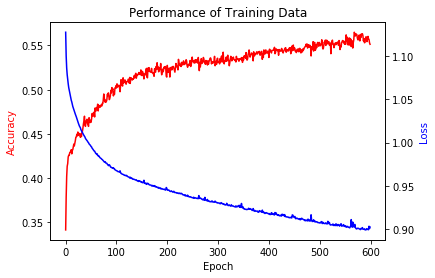

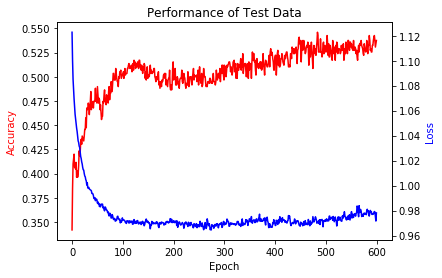


* 향후 주가는 횡보할 것으로 예상됨.
* 주가 횡보 확률 = 41.66 %
* 주가 하락 확률 = 25.76 %
* 주가 상승 확률 = 32.58 %
[array([[-0.931,  0.515, -0.547,  0.022,  0.093, -0.475,  0.278, -0.773,
         0.066,  0.251],
       [ 0.744, -0.297, -0.624,  0.207,  0.073, -0.136, -0.221, -0.773,
        -0.239,  0.369],
       [ 0.018,  0.217, -0.056, -0.789,  0.854, -0.354, -0.645,  0.129,
        -0.772,  0.082],
       [-0.589, -0.701, -0.101,  0.277, -0.017,  0.435, -0.441, -0.49 ,
         0.449,  0.339],
       [ 0.13 , -0.274,  0.791, -0.838,  0.394,  0.448,  0.135, -0.199,
        -0.779, -1.226],
       [ 0.521, -0.332, -0.067,  0.076,  0.225, -0.276,  0.118,  0.545,
        -0.499,  0.057]], dtype=float32), array([-0.005,  0.37 , -0.188, -0.047,  0.063, -0.318,  0.209,  0.07 ,
       -0.128,  0.052], dtype=float32)]

[array([[-1.172, -0.159, -0.306, -0.2  ,  0.703,  0.544, -0.156, -0.554,
         0.473,  0.085],
       [-0.881, -1.431,  0.509, -0.043,  0.372,  0.028,  0.012, -0.156,
         0.295, -0.18 ],
       

In [16]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from MyUtil import YahooData, FeatureSet

# Yahoo site로부터 삼성전자 주가 데이터를 수집한다
#sam = YahooData.getStockDataYahoo('000660.KS', '2007-01-01')

# 저장된 파일을 읽어온다
sam = pd.read_pickle('20190220/StockData/000660.KS') #sk하이닉스, 폴더 안에 들어있음
sam = sam.dropna()

# 주가 데이터 (OHLCV)로부터 기술적분석 지표들을 추출한다
# u = 0.8 : 수익률 표준편차의 0.8 배 이상이면 주가 상승 (class = 2)
# d = -0.8 : 수익률 표준편차의 -0.8배 이하이면 주가 하락 (class = 1)
# 아니면 주가 횡보 (classs = 0)
ft = FeatureSet.getFeatureSet(sam, u=0.6, d=-0.6, period=20)
plt.hist(ft['class'])
plt.show()


# 분석할 데이터를 읽어와서 적당히 섞은 후 80%는 학습데이터로, 20%는 시험 데이터로 사용한다
ft = shuffle(ft)
print(ft.head())
nLen = len(ft)
n = int(nLen * 0.8) - 1
trainX = ft.iloc[0:n,0:6].values
trainY = np_utils.to_categorical(ft.iloc[0:n,6].values)
testX = ft.iloc[n:(nLen-1),0:6].values
testY = np_utils.to_categorical(ft.iloc[n:(nLen-1),6].values) #원핫인코딩0-->(0,0,1),출력되게끔

# 인공신경망 모델을 생성함.
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu')) #교재p.51,입력6개
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax')) #합니 1인 확률 분포로 나옴 
adam = optimizers.Adam(lr = 0.0005)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# 학습 (Learning)/overfitting에 유의한다
history = model.fit(trainX, trainY, batch_size = 50, epochs = 600, 
                    validation_data=(testX, testY),verbose=1)

# 학습 데이터 성능 곡선을 그린다
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(history.history['acc'], color='red')
ax2.plot(history.history['loss'], color='blue')
ax1.set_xlabel("Epoch")
ax1.set_title("Performance of Training Data")
ax1.set_ylabel("Accuracy", color='red')
ax2.set_ylabel("Loss", color='blue')
plt.show()

# 시험 데이터 성능 곡선을 그린다
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(history.history['val_acc'], color='red')
ax2.plot(history.history['val_loss'], color='blue')
ax1.set_xlabel("Epoch")
ax1.set_title("Performance of Test Data")
ax1.set_ylabel("Accuracy", color='red')
ax2.set_ylabel("Loss", color='blue')
plt.show()

# 금일 측정된 Feature가 아래와 같다면, 향후 주가의 방향은 ?
todayX = np.array([[-0.23,-1.45,0.85,0.43,-0.38,0.5]])
predY = model.predict(todayX)
predClass = np.argmax(predY)
print()
if predClass == 0:
    print("* 향후 주가는 횡보할 것으로 예상됨.")
elif predClass == 1:
    print("* 향후 주가는 하락할 것으로 예상됨.")
else:
    print("* 향후 주가는 상승할 것으로 예상됨.")

# 출력층의 출력값을 출력함.
print("* 주가 횡보 확률 = %.2f %s" % (predY[0][0] * 100, '%'))
print("* 주가 하락 확률 = %.2f %s" % (predY[0][1] * 100, '%'))
print("* 주가 상승 확률 = %.2f %s" % (predY[0][2] * 100, '%'))

# weight 값을 출력해 본다 -->최종학습의 결과
np.set_printoptions(precision=3)
for layer in model.layers:
   weights = layer.get_weights()
   print(weights)
   print()